# ＜Numpyによる演習＞：k平均クラスタリング(k-means)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成

In [2]:
# 離れた3点を中心に、それぞれ100個ずつの点群を正規分布に従う乱数によって生成
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))      # np.vstackを使って縦方向に配列を結合

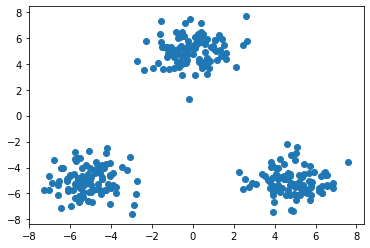

In [3]:
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

## 学習

k-meansアルゴリズムは以下のとおりである

1) 各クラスタ中心の初期値を設定する

2) 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる

3) 各クラスタの平均ベクトル（中心）を計算する

4) 収束するまで2, 3の処理を繰り返す

In [4]:
# 2点間の距離を計算
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max = 100

# ３つのクラスタの中心をランダムに選択して初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当てる
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を再計算
    for k in range(n_clusters):
        index_k = cluster_index == k    # 各クラスタ毎に、各データ点がクラスタに属した場合、インデックスにTrueをセット
        centers[k] = np.mean(X_train[index_k], axis=0)  # クラスタの中心を再計算（インデックスがTrueの場合だけ平均の対象）
    # 収束判定（中心の位置が変化しなくなった場合に終了）
    if np.allclose(prev_centers, centers):
        break

## クラスタリング結果
## numpy実装

In [5]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化：　メッシュの各点がどのクラスタに属するかを求めて境界線をプロット
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [6]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

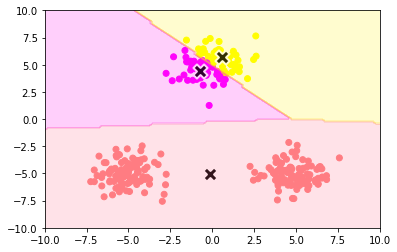

In [7]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

### ★クラスタの中心の初期値が近い場合、K-meansでは上手くクラスタリングができないことがある

## scikit-learn実装

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [9]:
print("labels: {}".format(kmeans.labels_))
print("cluster_centers: {}".format(kmeans.cluster_centers_))
kmeans.cluster_centers_

labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
cluster_centers: [[-0.09269214  5.02937708]
 [-5.09009992 -5.00128724]
 [ 4.86902039 -5.07594283]]


array([[-0.09269214,  5.02937708],
       [-5.09009992, -5.00128724],
       [ 4.86902039, -5.07594283]])

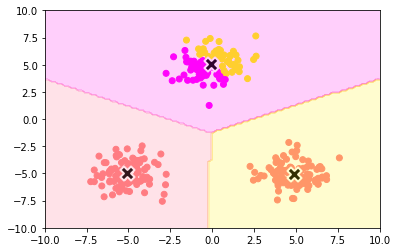

In [10]:
plt_result(X_train, kmeans.cluster_centers_, xx)

### ★sklearn.clusterのKMeansを用いた場合、適切な中心の初期値がセットされているらしく、結果、上手くクラスタリングができている

# ＜scikit-learnによる演習＞：ワインデータをK-meansで３つにクラスタリング
https://datahexa.com/kmeans-clustering-with-wine-dataset/参考

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [12]:
wine = datasets.load_wine()


In [13]:
X = wine.data
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [14]:
X.shape

(178, 13)

In [15]:
y=wine.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [16]:
y.shape

(178,)

In [17]:
# ワインのターゲット名は、'class_0', 'class_1', 'class_2'　の3種類
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [18]:
model = KMeans(n_clusters=3)

In [19]:
labels = model.fit_predict(X)

In [20]:
df = pd.DataFrame({'labels': labels})
type(df)

pandas.core.frame.DataFrame

In [21]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]     # 'class_0'
    if theta == 1:
        return wine.target_names[1]     # 'class_1'
    if theta == 2:
        return wine.target_names[2]     # 'class_2'

In [22]:
df['species'] = [species_label(theta) for theta in wine.target]

In [23]:
# pd.crosstab()：クロス集計　第一引数indexに結果の行見出しとなる列、第二引数columnsに結果の列見出しとなる列を指定
pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,0,50,19
1,46,1,0
2,13,20,29


###  ★k-means（k=3）のクラスタリングの結果、グループlabels 0はclass_1（50/69）が最大で、グループlabels1はclass_0（46/47）が最大。ただし、グループlabels 2はclass_2（29/62）が多いが、他のclassも多く混じっていて、labels 2は上手くクラスタリングできていない。